In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
%matplotlib inline

In [157]:
df=pd.read_csv('CC GENERAL.csv')

In [158]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7705,C17911,898.429424,1.000000,495.70,495.7,0.00,1526.899160,0.500000,0.500000,0.000000,0.625000,23,4,1200.0,1477.267198,859.154662,0.000000,8
3972,C14083,472.529777,0.545455,358.20,0.0,358.20,1818.821088,0.500000,0.000000,0.416667,0.083333,2,6,2500.0,485.184548,308.730195,0.500000,12
2378,C12451,2544.036536,1.000000,0.00,0.0,0.00,107.710567,0.000000,0.000000,0.000000,0.083333,1,0,7000.0,1064.575065,587.957563,0.000000,12
2465,C12539,5151.912071,1.000000,0.00,0.0,0.00,2873.077058,0.000000,0.000000,0.000000,0.166667,4,0,7000.0,1362.424363,1240.254115,0.000000,12
82,C10086,3.786310,0.636364,133.05,28.2,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12


In [159]:
df.shape

(8950, 18)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [161]:
df=df.drop('CUST_ID',axis=1)

Dropping Customer ID, as it does not serve much help

In [162]:
df.isnull().sum()/df.count()

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.036239
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

There are some Null values in Minimum Payments and credit limit

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


<Axes: >

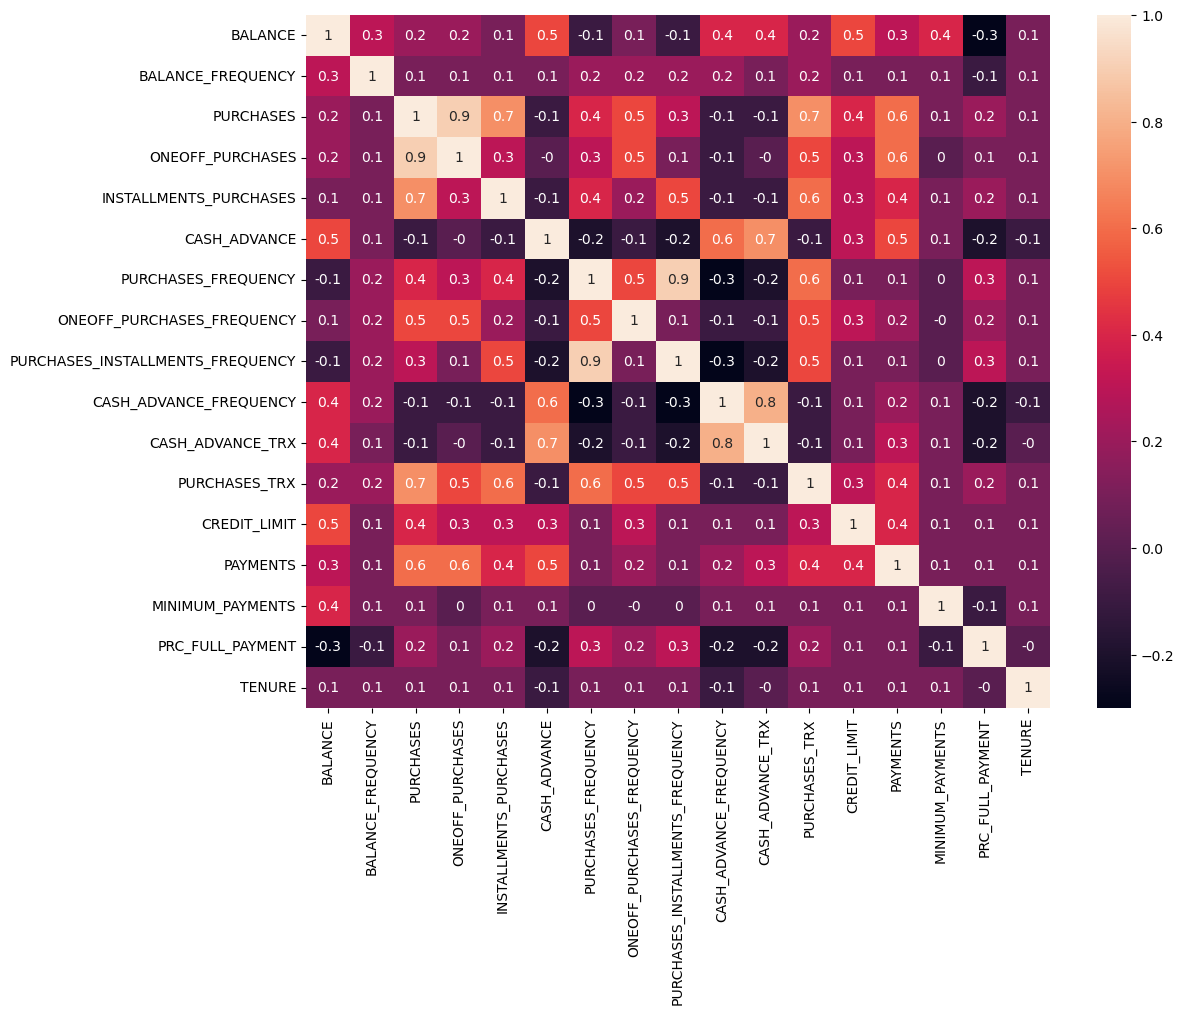

In [164]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr().round(1),annot=True)

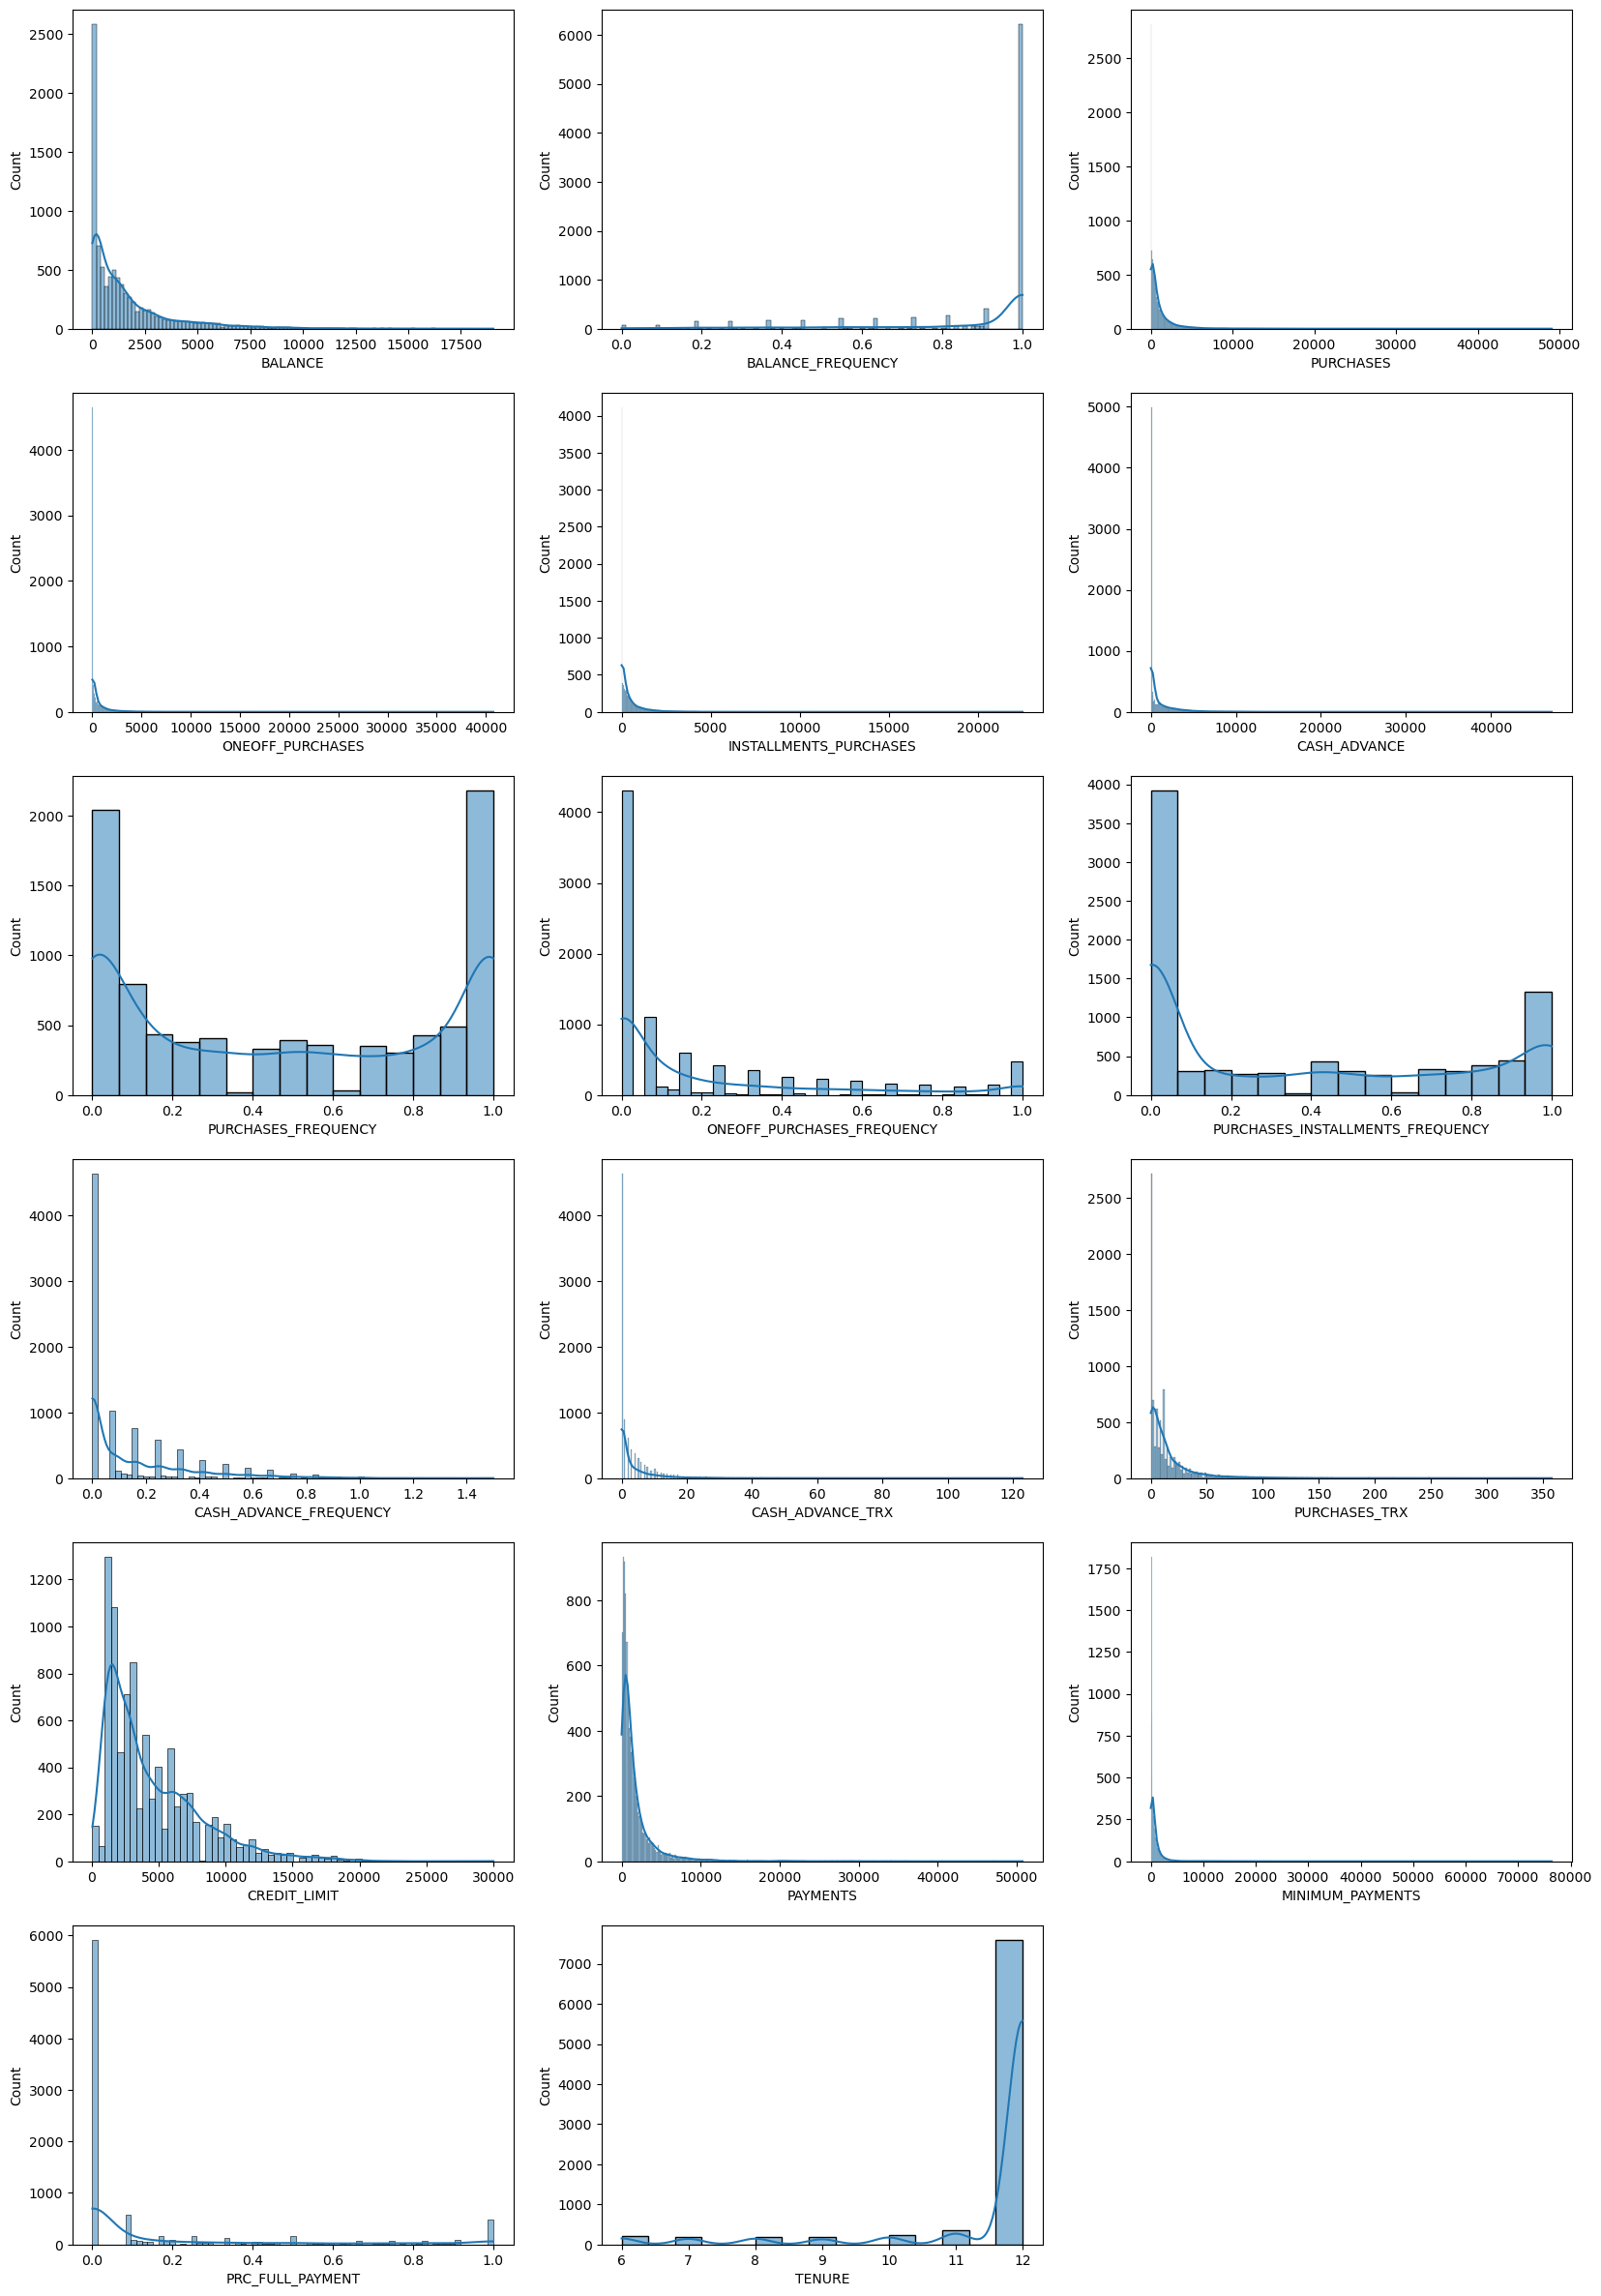

In [165]:
plt.figure(figsize=(20,30))
for i,col in enumerate(df.columns):
    ax=plt.subplot(6,3,i+1)
    sns.histplot(df[col],kde=True,ax=ax)

The data distribution on columns looks Skewed

In [166]:
for col in df.columns:
    data=df[col]
    
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    
    IQR=Q3-Q1
    Min=Q1-(1.5*IQR)
    Max=Q3+(1.5*IQR)
    
    Outliers= ((data > Max) | (data < Min))
    
    df.loc[Outliers,col]=np.nan


Since the data is Skewed, we will use IQR proximity to detect outliers. 
The Outliers are replaced by NAN value and then imputed.This technique is called Discretization.
Then, the imputation is done by KNN imputation because this is data is about clustering


In [167]:
df.isnull().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [168]:
knn = KNNImputer(n_neighbors=3,weights='distance')

df=pd.DataFrame(knn.fit_transform(df),columns=df.columns)

In [169]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1255.366069,1.315829e+03,0.000000,127.919481,862.344762,1929.433752,4940.113918
BALANCE_FREQUENCY,8950.0,0.977919,6.031388e-02,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,623.404611,6.857375e+02,0.000000,39.550000,360.000000,1039.102500,2711.900000
ONEOFF_PURCHASES,8950.0,227.281172,3.519304e+02,0.000000,0.000000,3.717538,335.969215,1443.330000
INSTALLMENTS_PURCHASES,8950.0,231.927626,2.902380e+02,0.000000,0.000000,88.980000,443.235000,1170.490000
CASH_ADVANCE,8950.0,482.852123,7.458237e+02,0.000000,0.000000,0.000000,809.358673,2784.294727
PURCHASES_FREQUENCY,8950.0,0.490351,4.013707e-01,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.172123,2.325166e-01,0.000000,0.000000,0.083333,0.256342,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,3.974478e-01,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.108721,1.470899e-01,0.000000,0.000000,0.000000,0.166667,0.545455


In [171]:
df.skew()

BALANCE                             1.067670
BALANCE_FREQUENCY                  -2.843730
PURCHASES                           1.082793
ONEOFF_PURCHASES                    1.652671
INSTALLMENTS_PURCHASES              1.172891
CASH_ADVANCE                        1.424498
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.189784
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.216126
CASH_ADVANCE_TRX                    1.486796
PURCHASES_TRX                       0.989465
CREDIT_LIMIT                        0.910730
PAYMENTS                            0.963636
MINIMUM_PAYMENTS                    0.995202
PRC_FULL_PAYMENT                    2.634002
TENURE                              0.000000
dtype: float64

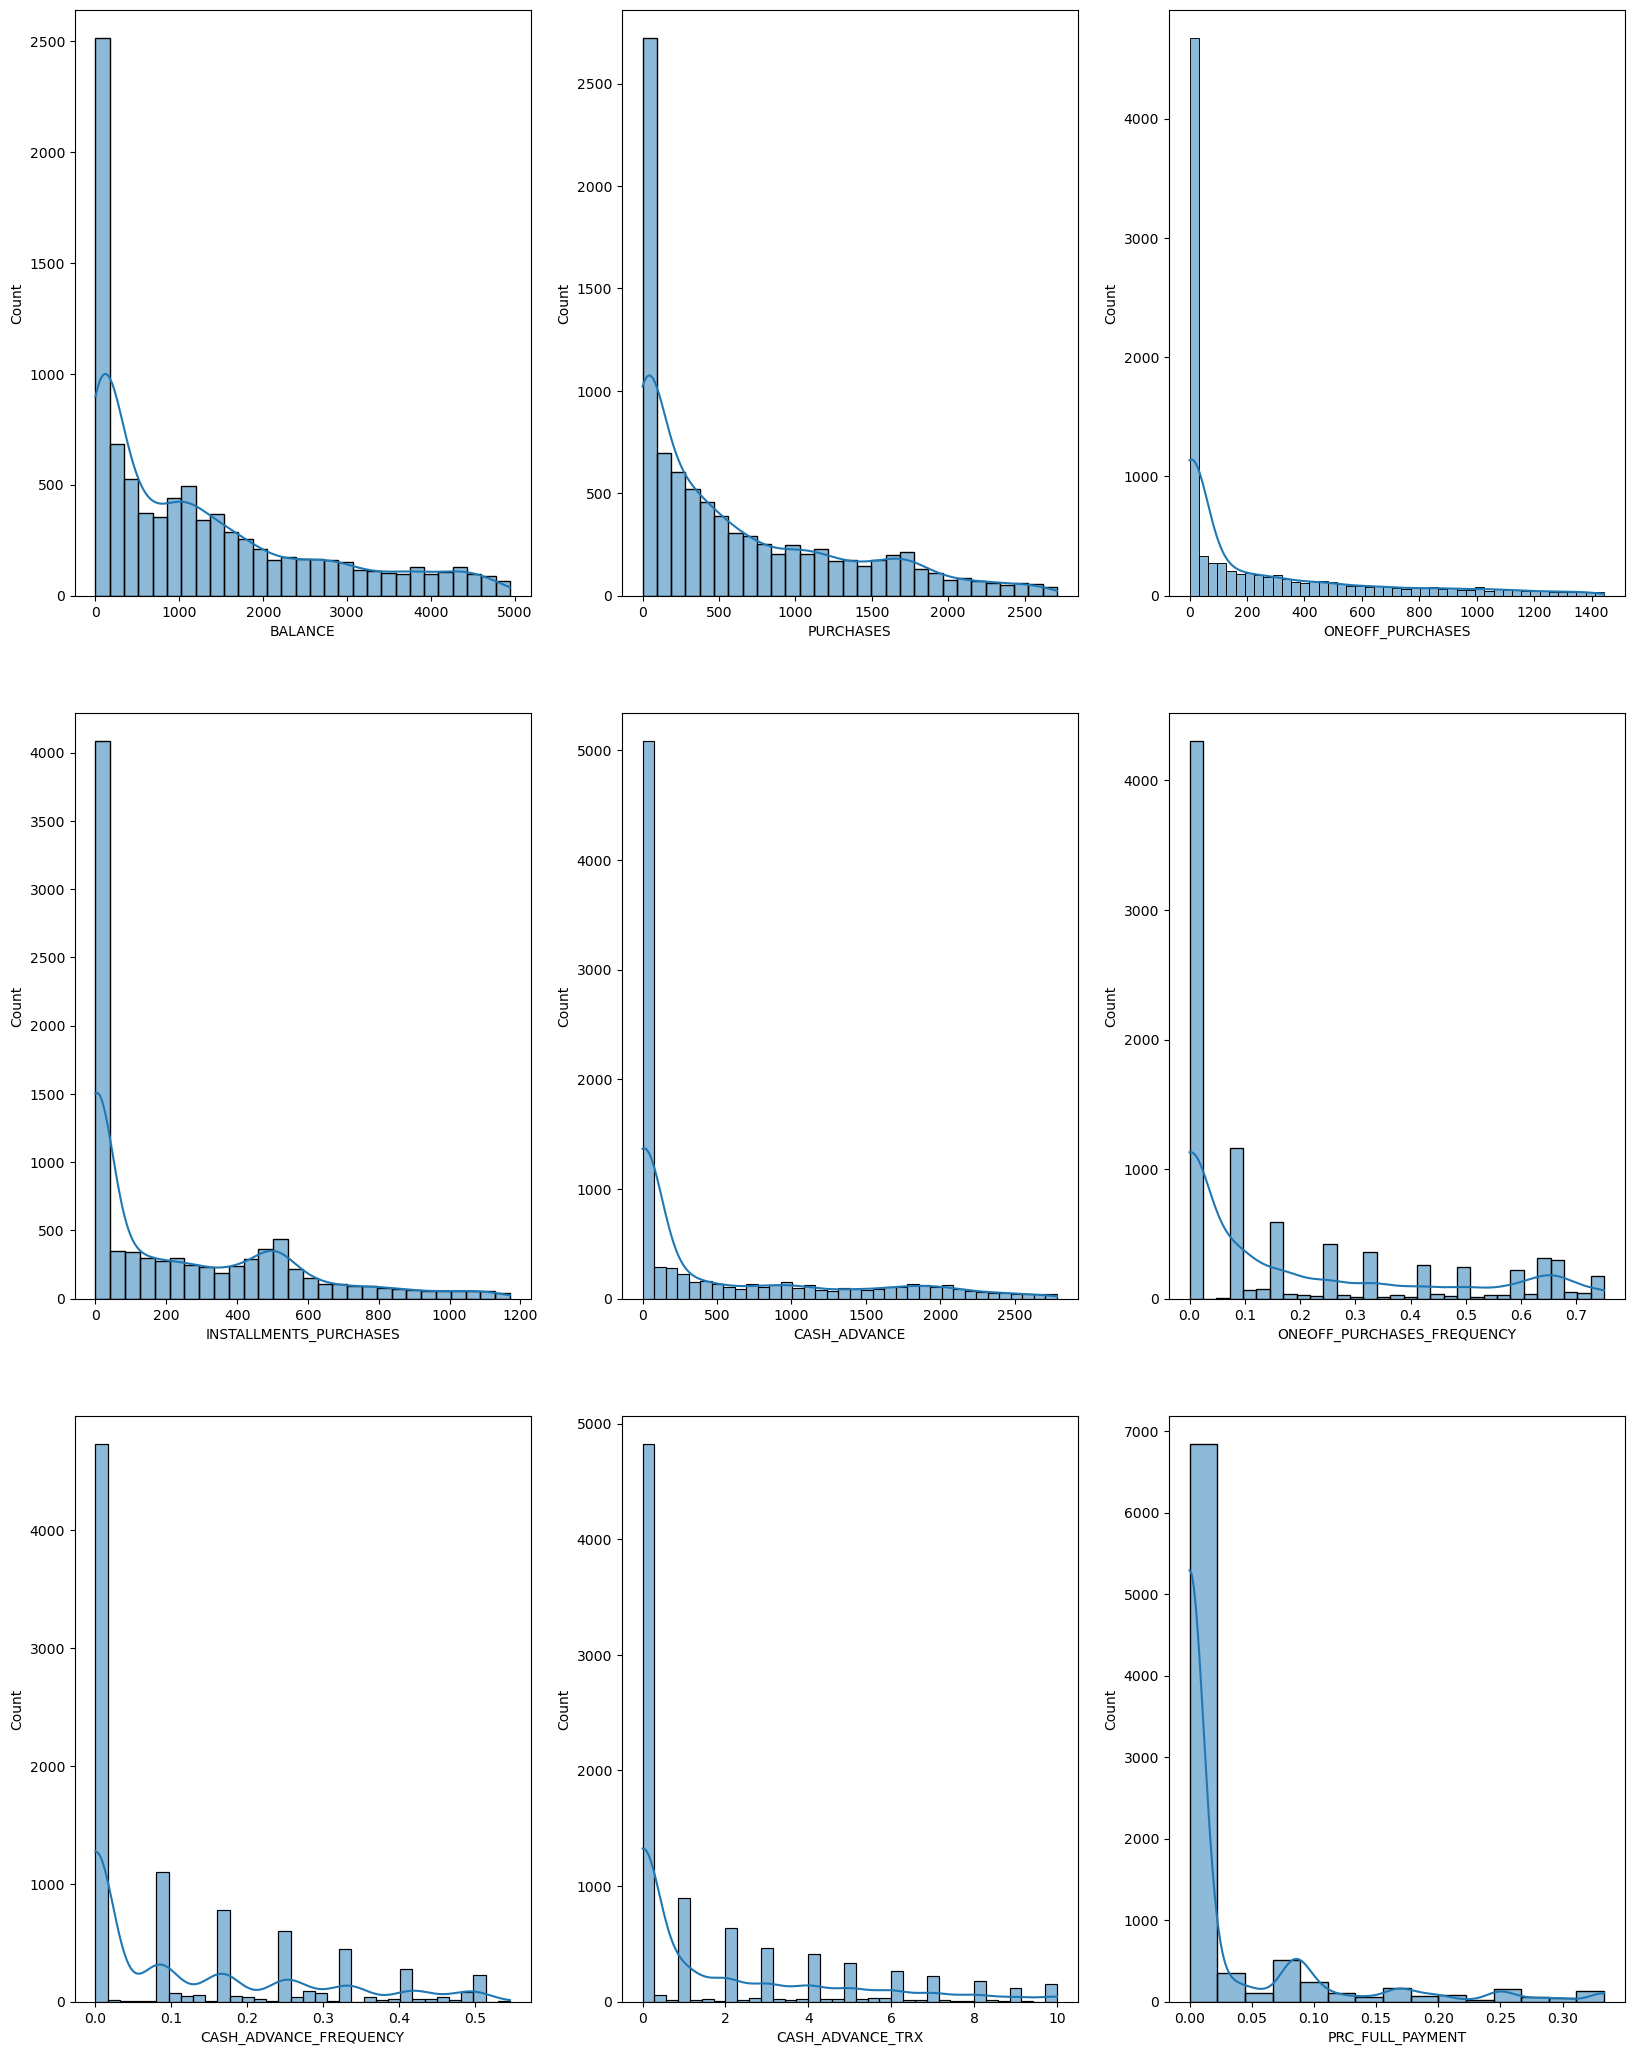

In [172]:
Skewed_col=df.drop(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT',
                    'PAYMENTS','MINIMUM_PAYMENTS','TENURE'],axis=1)
plt.figure(figsize=(20,35))
for i,col in enumerate(Skewed_col):
    ax=plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True,ax=ax)

In [173]:
trans_df=df.copy()
Skewed_col=df.drop(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT',
                    'PAYMENTS','MINIMUM_PAYMENTS','TENURE'],axis=1)
for col in Skewed_col:
    trans_df[col]=np.log1p(trans_df[col])
    
trans_df.skew()

BALANCE                            -0.992463
BALANCE_FREQUENCY                  -2.843730
PURCHASES                          -0.891388
ONEOFF_PURCHASES                    0.193018
INSTALLMENTS_PURCHASES             -0.111437
CASH_ADVANCE                        0.306989
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.036481
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.069821
CASH_ADVANCE_TRX                    0.735502
PURCHASES_TRX                       0.989465
CREDIT_LIMIT                        0.910730
PAYMENTS                            0.963636
MINIMUM_PAYMENTS                    0.995202
PRC_FULL_PAYMENT                    2.490203
TENURE                              0.000000
dtype: float64

Since Most of the columns are Right skewed,we will use log transformation.

In [174]:
left_skew=trans_df.drop(['ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],axis=1)
for i in left_skew:
    trans_df[i]=np.square(trans_df[i])
    
trans_df.skew()

BALANCE                            -0.364549
BALANCE_FREQUENCY                  -2.723186
PURCHASES                          -0.345126
ONEOFF_PURCHASES                    0.193018
INSTALLMENTS_PURCHASES             -0.111437
CASH_ADVANCE                        0.306989
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.036481
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.069821
CASH_ADVANCE_TRX                    0.735502
PURCHASES_TRX                       0.989465
CREDIT_LIMIT                        0.910730
PAYMENTS                            0.963636
MINIMUM_PAYMENTS                    0.995202
PRC_FULL_PAYMENT                    2.490203
TENURE                              0.000000
dtype: float64

Two Columns are left skewed. So, we will use square transformation on it.

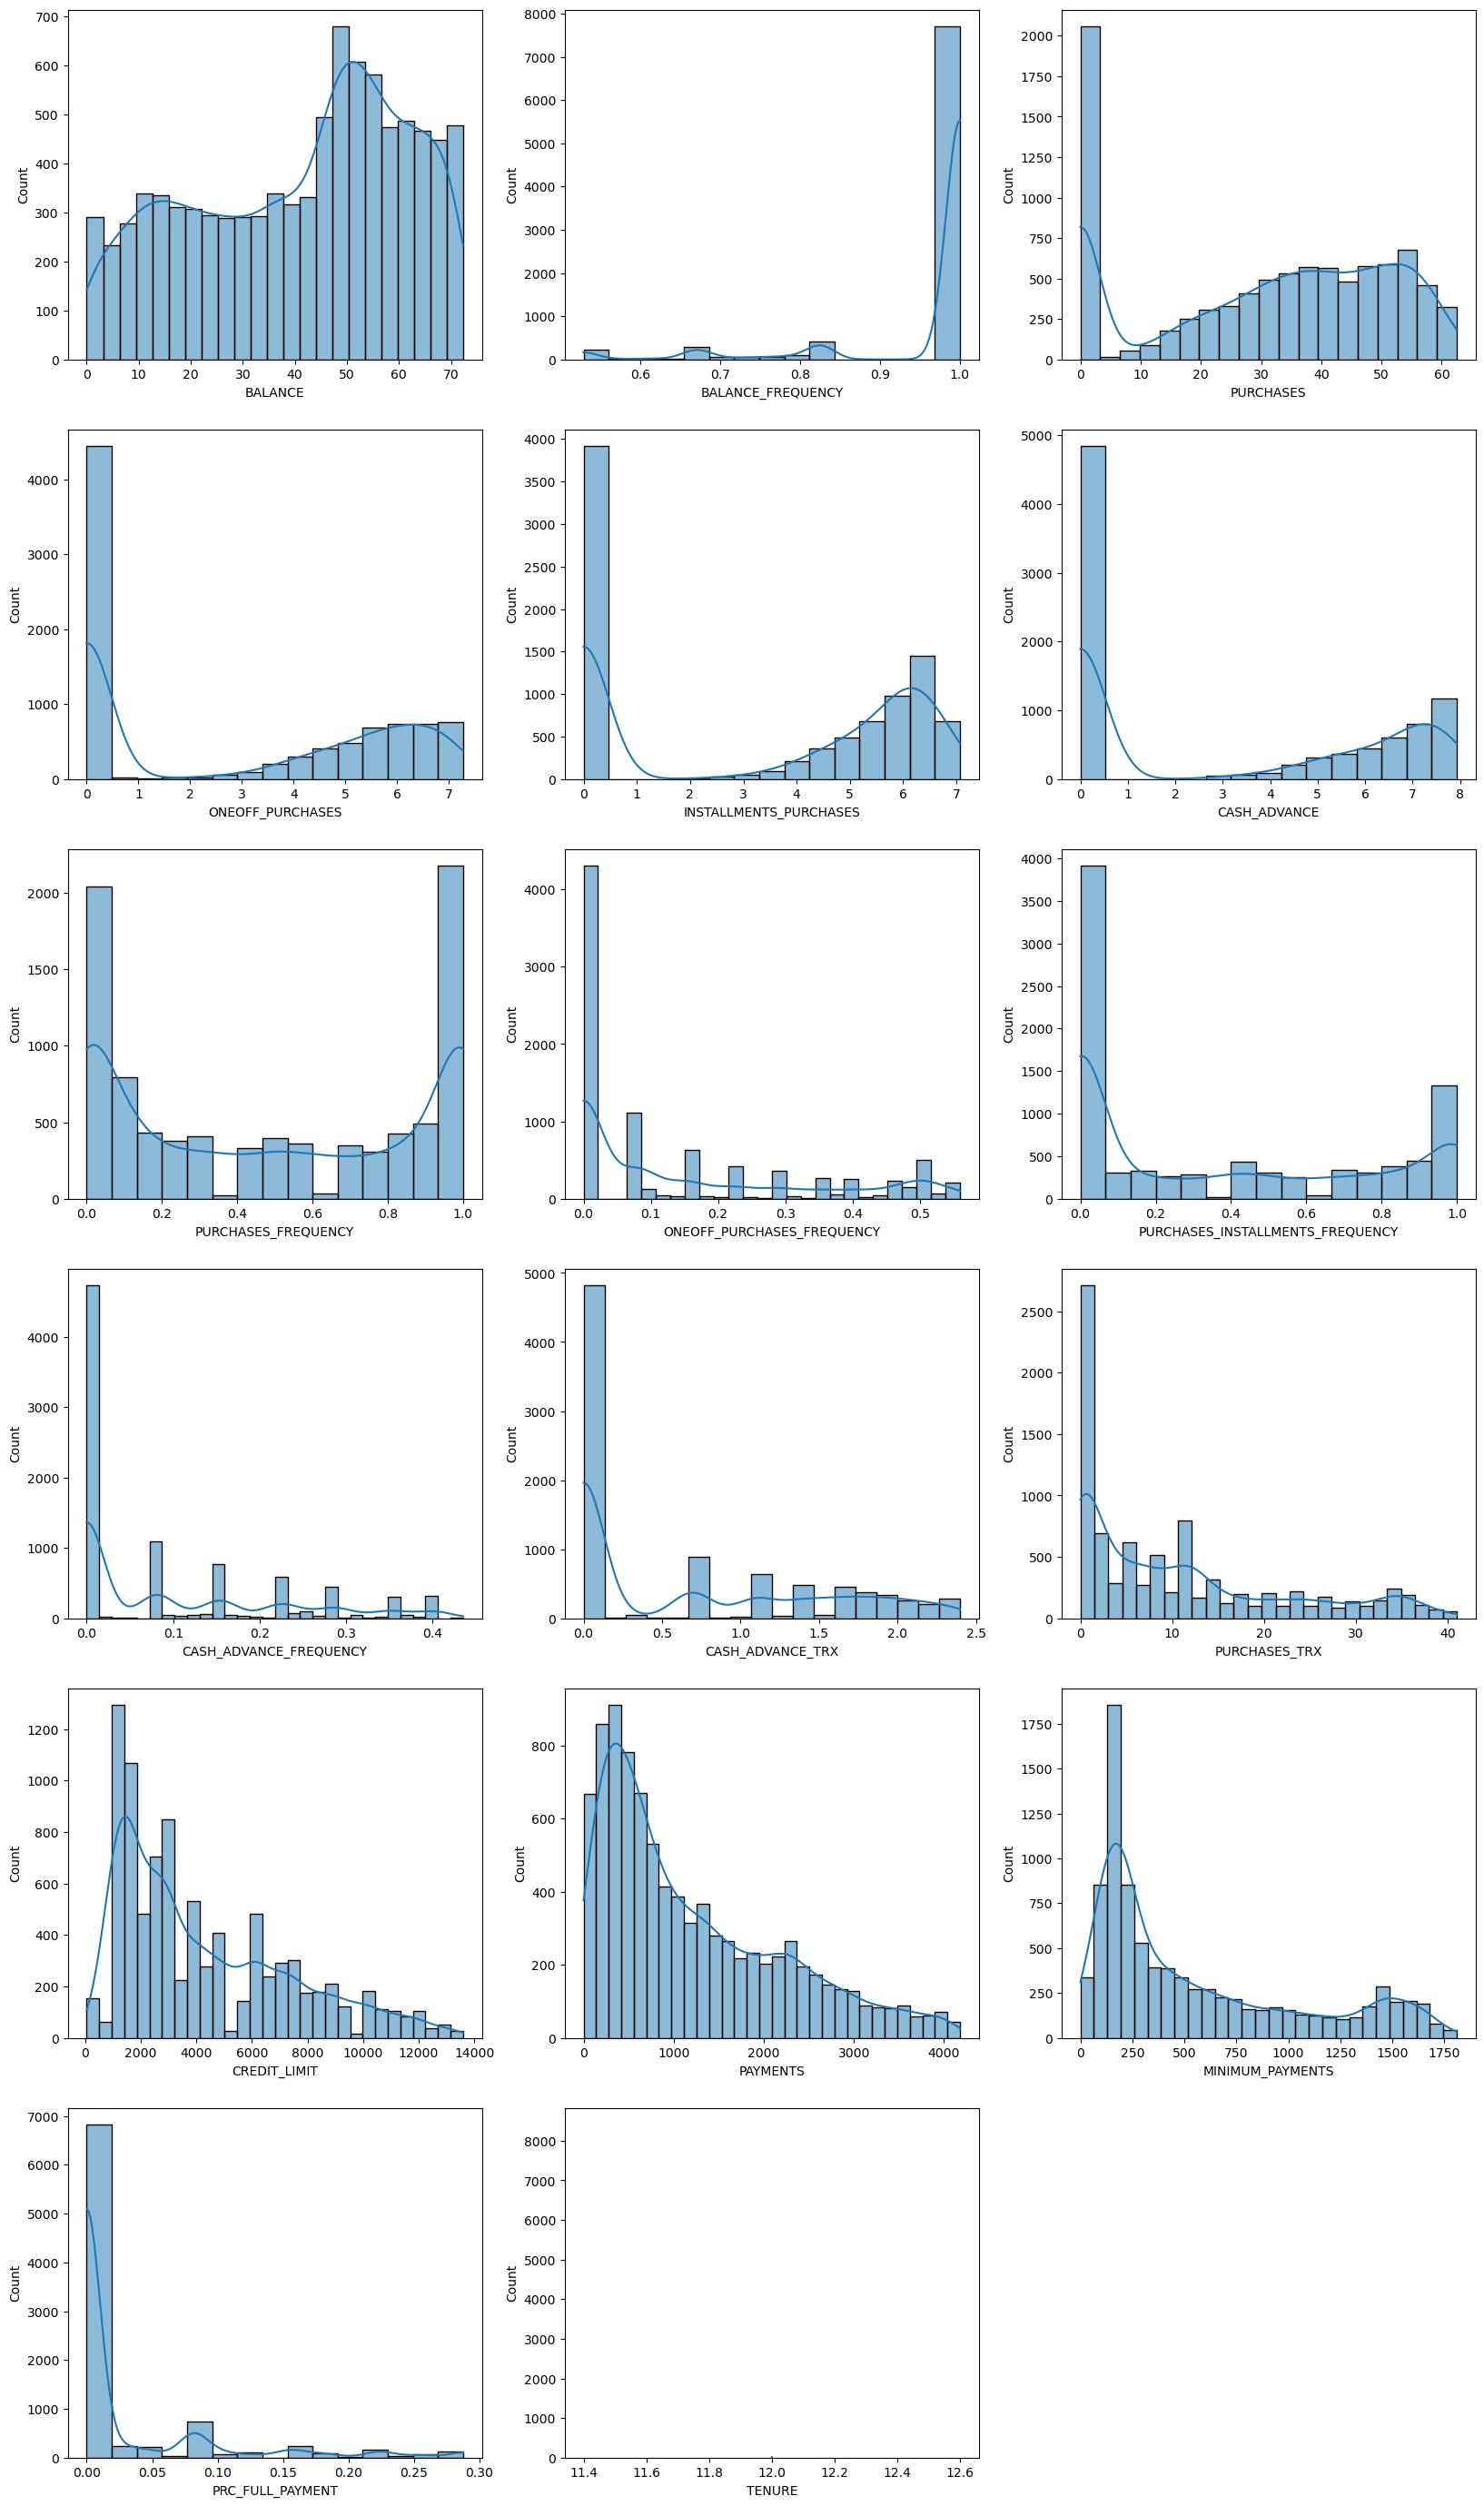

In [175]:
plt.figure(figsize=(20,35))
for i,col in enumerate(trans_df.columns):
    ax=plt.subplot(6,3,i+1)
    sns.histplot(trans_df[col],kde=True,ax=ax)

In [176]:
trans_df.skew()

BALANCE                            -0.364549
BALANCE_FREQUENCY                  -2.723186
PURCHASES                          -0.345126
ONEOFF_PURCHASES                    0.193018
INSTALLMENTS_PURCHASES             -0.111437
CASH_ADVANCE                        0.306989
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.036481
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.069821
CASH_ADVANCE_TRX                    0.735502
PURCHASES_TRX                       0.989465
CREDIT_LIMIT                        0.910730
PAYMENTS                            0.963636
MINIMUM_PAYMENTS                    0.995202
PRC_FULL_PAYMENT                    2.490203
TENURE                              0.000000
dtype: float64

In [177]:
trans_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,13.952494,0.669422,20.871249,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,65.157008,0.826446,0.000000,0.000000,0.000000,7.379502,0.000000,0.000000,0.000000,0.223144,1.609438,0.0,7000.0,4103.032597,1072.340217,0.200671,12.0
2,61.191575,1.000000,44.246330,6.651791,0.000000,0.000000,1.000000,0.498247,0.000000,0.000000,0.000000,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,55.044277,1.000000,53.483192,5.976759,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,1.0,7500.0,0.000000,1624.465091,0.000000,12.0
4,44.993712,1.000000,8.027098,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,11.452610,1.000000,32.230199,0.000000,5.677165,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,6.0,1000.0,325.594462,48.886365,0.015899,12.0
8946,9.029131,1.000000,32.571108,0.000000,5.707110,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,6.0,1000.0,275.861322,1449.592355,0.000000,12.0
8947,10.205014,0.694444,24.795306,0.000000,4.979489,0.000000,0.833333,0.000000,0.666667,0.000000,0.000000,5.0,1000.0,81.270775,82.418369,0.223144,12.0
8948,7.135404,0.694444,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.0,500.0,52.549959,55.755628,0.223144,12.0


Now we will use standardization to transform data in a defined range

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
ss=StandardScaler()

In [180]:
df_scaler=ss.fit_transform(trans_df)

In [181]:
df_scaler=pd.DataFrame(df_scaler,columns=df.columns)

In [208]:
df_scaler.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.476976e-16,1.000056e+00,-2.006497e+00,-0.847490,0.237162,0.803036,1.544439e+00
BALANCE_FREQUENCY,8950.0,-9.844391e-17,1.000056e+00,-4.002508e+00,0.371775,0.371775,0.371775,3.717749e-01
PURCHASES,8950.0,2.540488e-17,1.000056e+00,-1.504494e+00,-0.833323,0.193358,0.858370,1.555520e+00
ONEOFF_PURCHASES,8950.0,-5.716098e-17,1.000056e+00,-9.642753e-01,-0.964275,-0.434628,1.022811,1.519723e+00
INSTALLMENTS_PURCHASES,8950.0,1.099555e-16,1.000056e+00,-1.103039e+00,-1.103039,0.439711,0.987186,1.319655e+00
CASH_ADVANCE,8950.0,-1.762464e-16,1.000056e+00,-8.952976e-01,-0.895298,-0.895298,1.114915,1.485483e+00
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056e+00,-1.221758e+00,-1.014125,0.024043,1.062211,1.269843e+00
ONEOFF_PURCHASES_FREQUENCY,8950.0,-3.175610e-17,1.000056e+00,-7.788146e-01,-0.778815,-0.337772,0.478605,2.304733e+00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056e+00,-9.169952e-01,-0.916995,-0.497629,0.970151,1.599199e+00
CASH_ADVANCE_FREQUENCY,8950.0,-5.676403e-17,1.000056e+00,-7.655136e-01,-0.765514,-0.765514,0.474769,2.737012e+00


PCA is a dimension reduction method. It reduces high dimension data to smaller dimension

In [183]:
from sklearn.decomposition import PCA

In [184]:
pca=PCA()
df_pca=pca.fit_transform(df_scaler)


In [185]:
# comp_num=[f'PC{i+1}' for i in range(df_pca.shape[1])]

df_pca=pd.DataFrame(df_pca,columns=df_scaler.columns)

In [186]:
df_pca.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.397334,-3.233342,-0.140202,0.700632,-0.049247,2.412049,0.043461,-0.335847,0.057668,0.088558,0.160053,0.695367,0.324274,-0.290166,0.056386,0.093026,7.272941e-18
1,-3.228084,1.832121,0.331666,2.879754,2.864869,-0.106298,1.324216,-0.806686,-0.150181,0.093921,-0.122441,-0.267253,-0.106813,-0.196914,0.100758,0.094188,-2.598859e-17
2,1.394383,0.913095,-2.631173,-1.114907,-0.139527,-0.038617,0.162544,0.714349,-1.113509,-0.100538,0.112095,-0.107743,-1.089975,0.455930,0.062013,0.556113,4.264408e-17
3,-1.334759,1.086461,-1.393949,-1.663729,0.210796,0.388212,1.141317,1.580531,1.158718,-0.206321,-0.544413,0.240717,0.077735,0.994752,-0.398448,-0.448270,-4.796510e-17
4,-1.211250,-1.904689,-1.314205,-0.874711,-0.008701,-0.332968,0.289242,-0.779697,-0.538994,-0.567413,0.045687,-0.367686,0.060683,-0.262657,0.135174,0.036431,4.147805e-17


In [187]:
pca.explained_variance_ratio_

array([3.41431860e-01, 1.88579731e-01, 1.02466875e-01, 8.19210514e-02,
       6.21150433e-02, 5.67525465e-02, 4.19380632e-02, 3.53778256e-02,
       2.16104595e-02, 2.03482922e-02, 1.24046385e-02, 1.03522653e-02,
       9.50524427e-03, 8.24002708e-03, 4.39236362e-03, 2.56371284e-03,
       1.35248993e-32])

In [188]:
pca.explained_variance_ratio_.cumsum()

array([0.34143186, 0.53001159, 0.63247847, 0.71439952, 0.77651456,
       0.83326711, 0.87520517, 0.910583  , 0.93219346, 0.95254175,
       0.96494639, 0.97529865, 0.9848039 , 0.99304392, 0.99743629,
       1.        , 1.        ])

In [189]:
import plotly.express as px
px.area(
    x=range(1, pca.explained_variance_ratio_.cumsum().shape[0] + 1),
    y=pca.explained_variance_ratio_.cumsum(),
    labels={"x": "# Components", "y": "Cumulative Variance"}
)

Since 8 components can explain 90% of variance. So,we will use 8 n_components

In [190]:
px.bar(x=range(1,pca.explained_variance_ratio_.shape[0]+1),y=pca.explained_variance_ratio_,labels={"x": "# Components", "y": "Explained Variance"}
)

In [191]:
import plotly.express as px
px.area(
    x=range(1,pca.explained_variance_ratio_.shape[0]+1),
    y=pca.explained_variance_ratio_,
    labels={"x": "# Components", "y": "Explained Variance Ratio"}
)

In [192]:
pca = PCA(n_components = 8 )

df_pca = pca.fit_transform(df_scaler)
df_pca

array([[-0.39733444, -3.23334201, -0.14020201, ...,  2.41204936,
         0.04346106, -0.33584749],
       [-3.22808416,  1.83212062,  0.33166589, ..., -0.10629752,
         1.32421594, -0.80668591],
       [ 1.39438261,  0.91309452, -2.63117317, ..., -0.0386173 ,
         0.16254407,  0.71434901],
       ...,
       [ 1.14668797, -3.23789191,  1.19757929, ...,  0.86212761,
         1.55847284,  0.98126421],
       [-2.4123429 , -2.88187582,  0.01936102, ...,  0.49382135,
         1.27395375,  0.96074074],
       [ 0.15934377,  1.00689526, -1.71740482, ..., -0.5727833 ,
        -0.46885849,  0.41134852]])

In [193]:
pca.explained_variance_ratio_

array([0.34143186, 0.18857973, 0.10246688, 0.08192105, 0.06211504,
       0.05675255, 0.04193806, 0.03537783])

In [194]:
pca.explained_variance_ratio_.cumsum()

array([0.34143186, 0.53001159, 0.63247847, 0.71439952, 0.77651456,
       0.83326711, 0.87520517, 0.910583  ])

In [195]:
px.area(
    x=range(1, pca.explained_variance_ratio_.cumsum().shape[0] + 1),
    y=pca.explained_variance_ratio_.cumsum(),
    labels={"x": "# Components", "y": "Cumulative Variance"}
)

In [196]:
px.bar(x=range(1,pca.explained_variance_ratio_.shape[0]+1),y=pca.explained_variance_ratio_,labels={"x": "# Components", "y": "Explained Variance"}
)

In [197]:
from sklearn.cluster import KMeans

In [198]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df_pca)
    wcss.append(km.inertia_)

C:\Users\deves\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\deves\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\deves\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\deves\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\deves\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

We will use elbow method to decide the number of clusters 

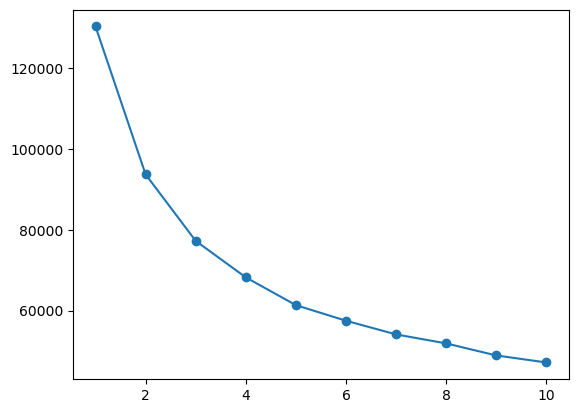

In [199]:
plt.plot(range(1,11),wcss,'-o')

3 clusters seems like a good choice

In [200]:
kmeans = KMeans(n_clusters = 3, random_state=7)

pca_labels = kmeans.fit_predict(df_pca)



C:\Users\deves\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [201]:
df_pca

array([[-0.39733444, -3.23334201, -0.14020201, ...,  2.41204936,
         0.04346106, -0.33584749],
       [-3.22808416,  1.83212062,  0.33166589, ..., -0.10629752,
         1.32421594, -0.80668591],
       [ 1.39438261,  0.91309452, -2.63117317, ..., -0.0386173 ,
         0.16254407,  0.71434901],
       ...,
       [ 1.14668797, -3.23789191,  1.19757929, ...,  0.86212761,
         1.55847284,  0.98126421],
       [-2.4123429 , -2.88187582,  0.01936102, ...,  0.49382135,
         1.27395375,  0.96074074],
       [ 0.15934377,  1.00689526, -1.71740482, ..., -0.5727833 ,
        -0.46885849,  0.41134852]])

In [202]:
df['cluster_type']=kmeans.labels_

In [203]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_type
0,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.000000,0.00,1601.792075,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.170000,0.00,0.000000,1.000000,0.645833,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1
3,1666.670542,1.000000,1499.00,393.160803,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,1624.465091,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.016026,12.0,2
8946,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,1449.592355,0.000000,12.0,2
8947,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,12.0,2
8948,13.457564,0.833333,0.00,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,12.0,0


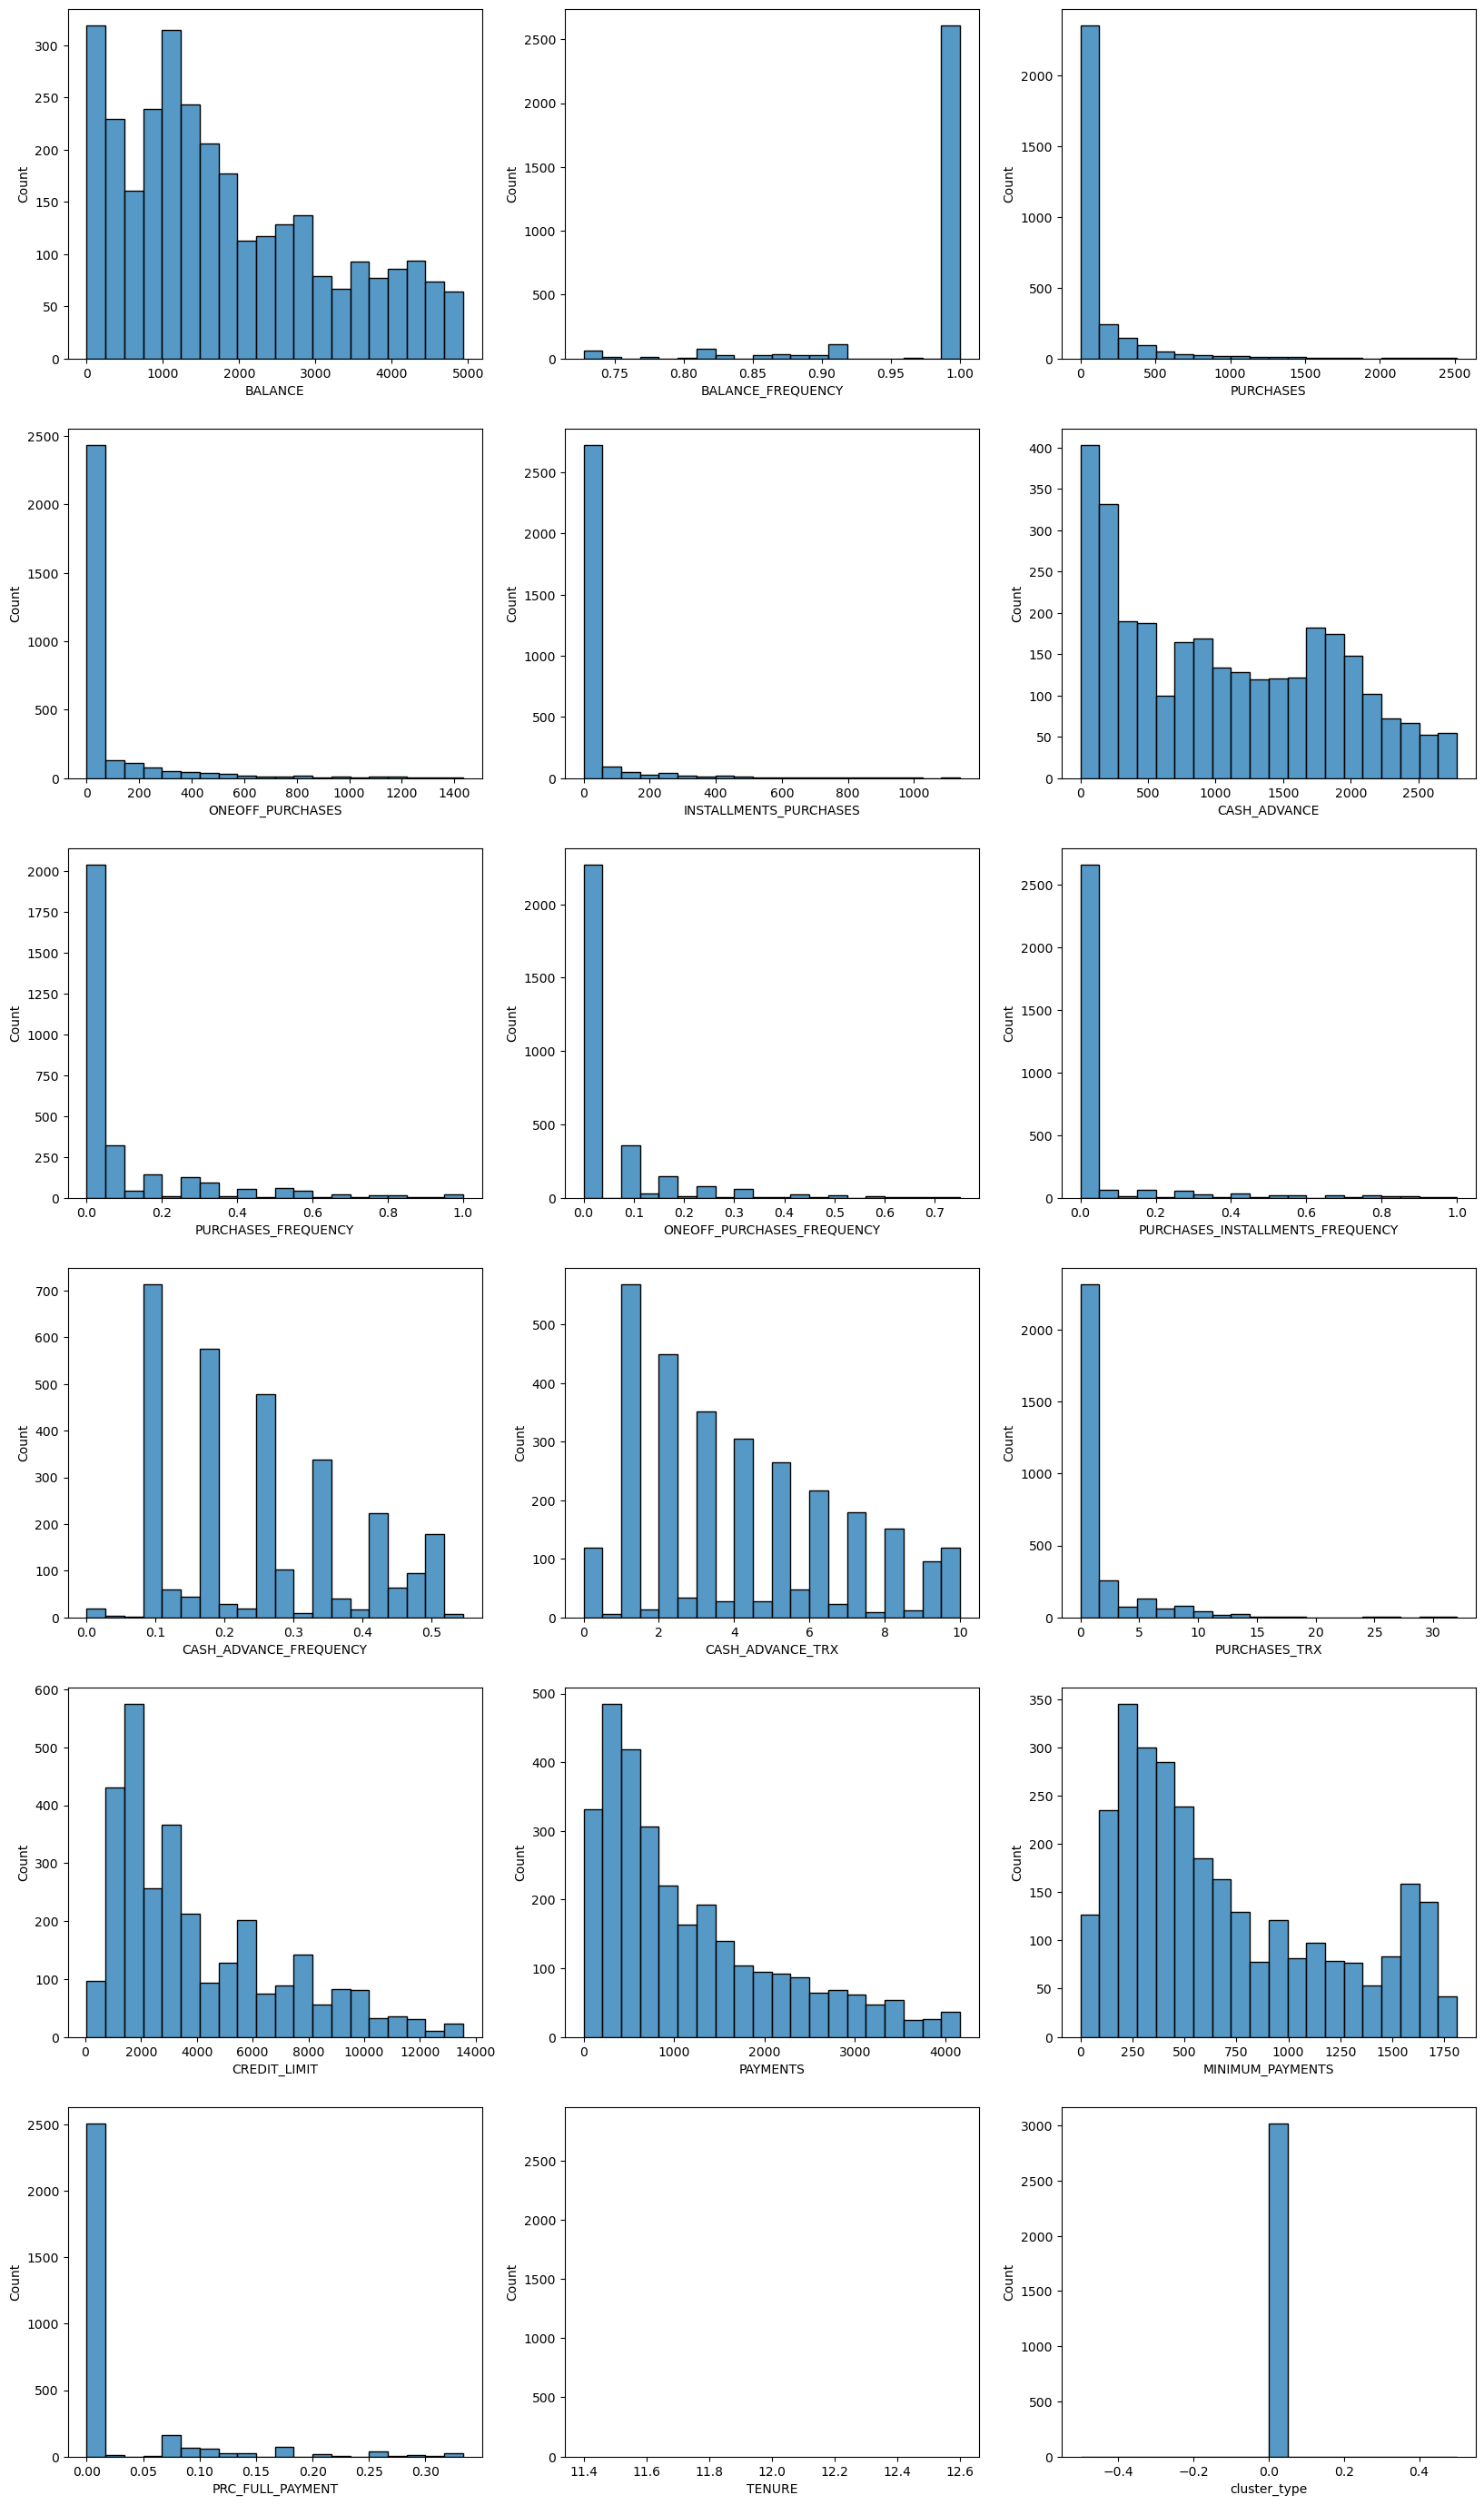

In [204]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['cluster_type'] == 0])

        plt.xlabel(col)
        
plt.show()

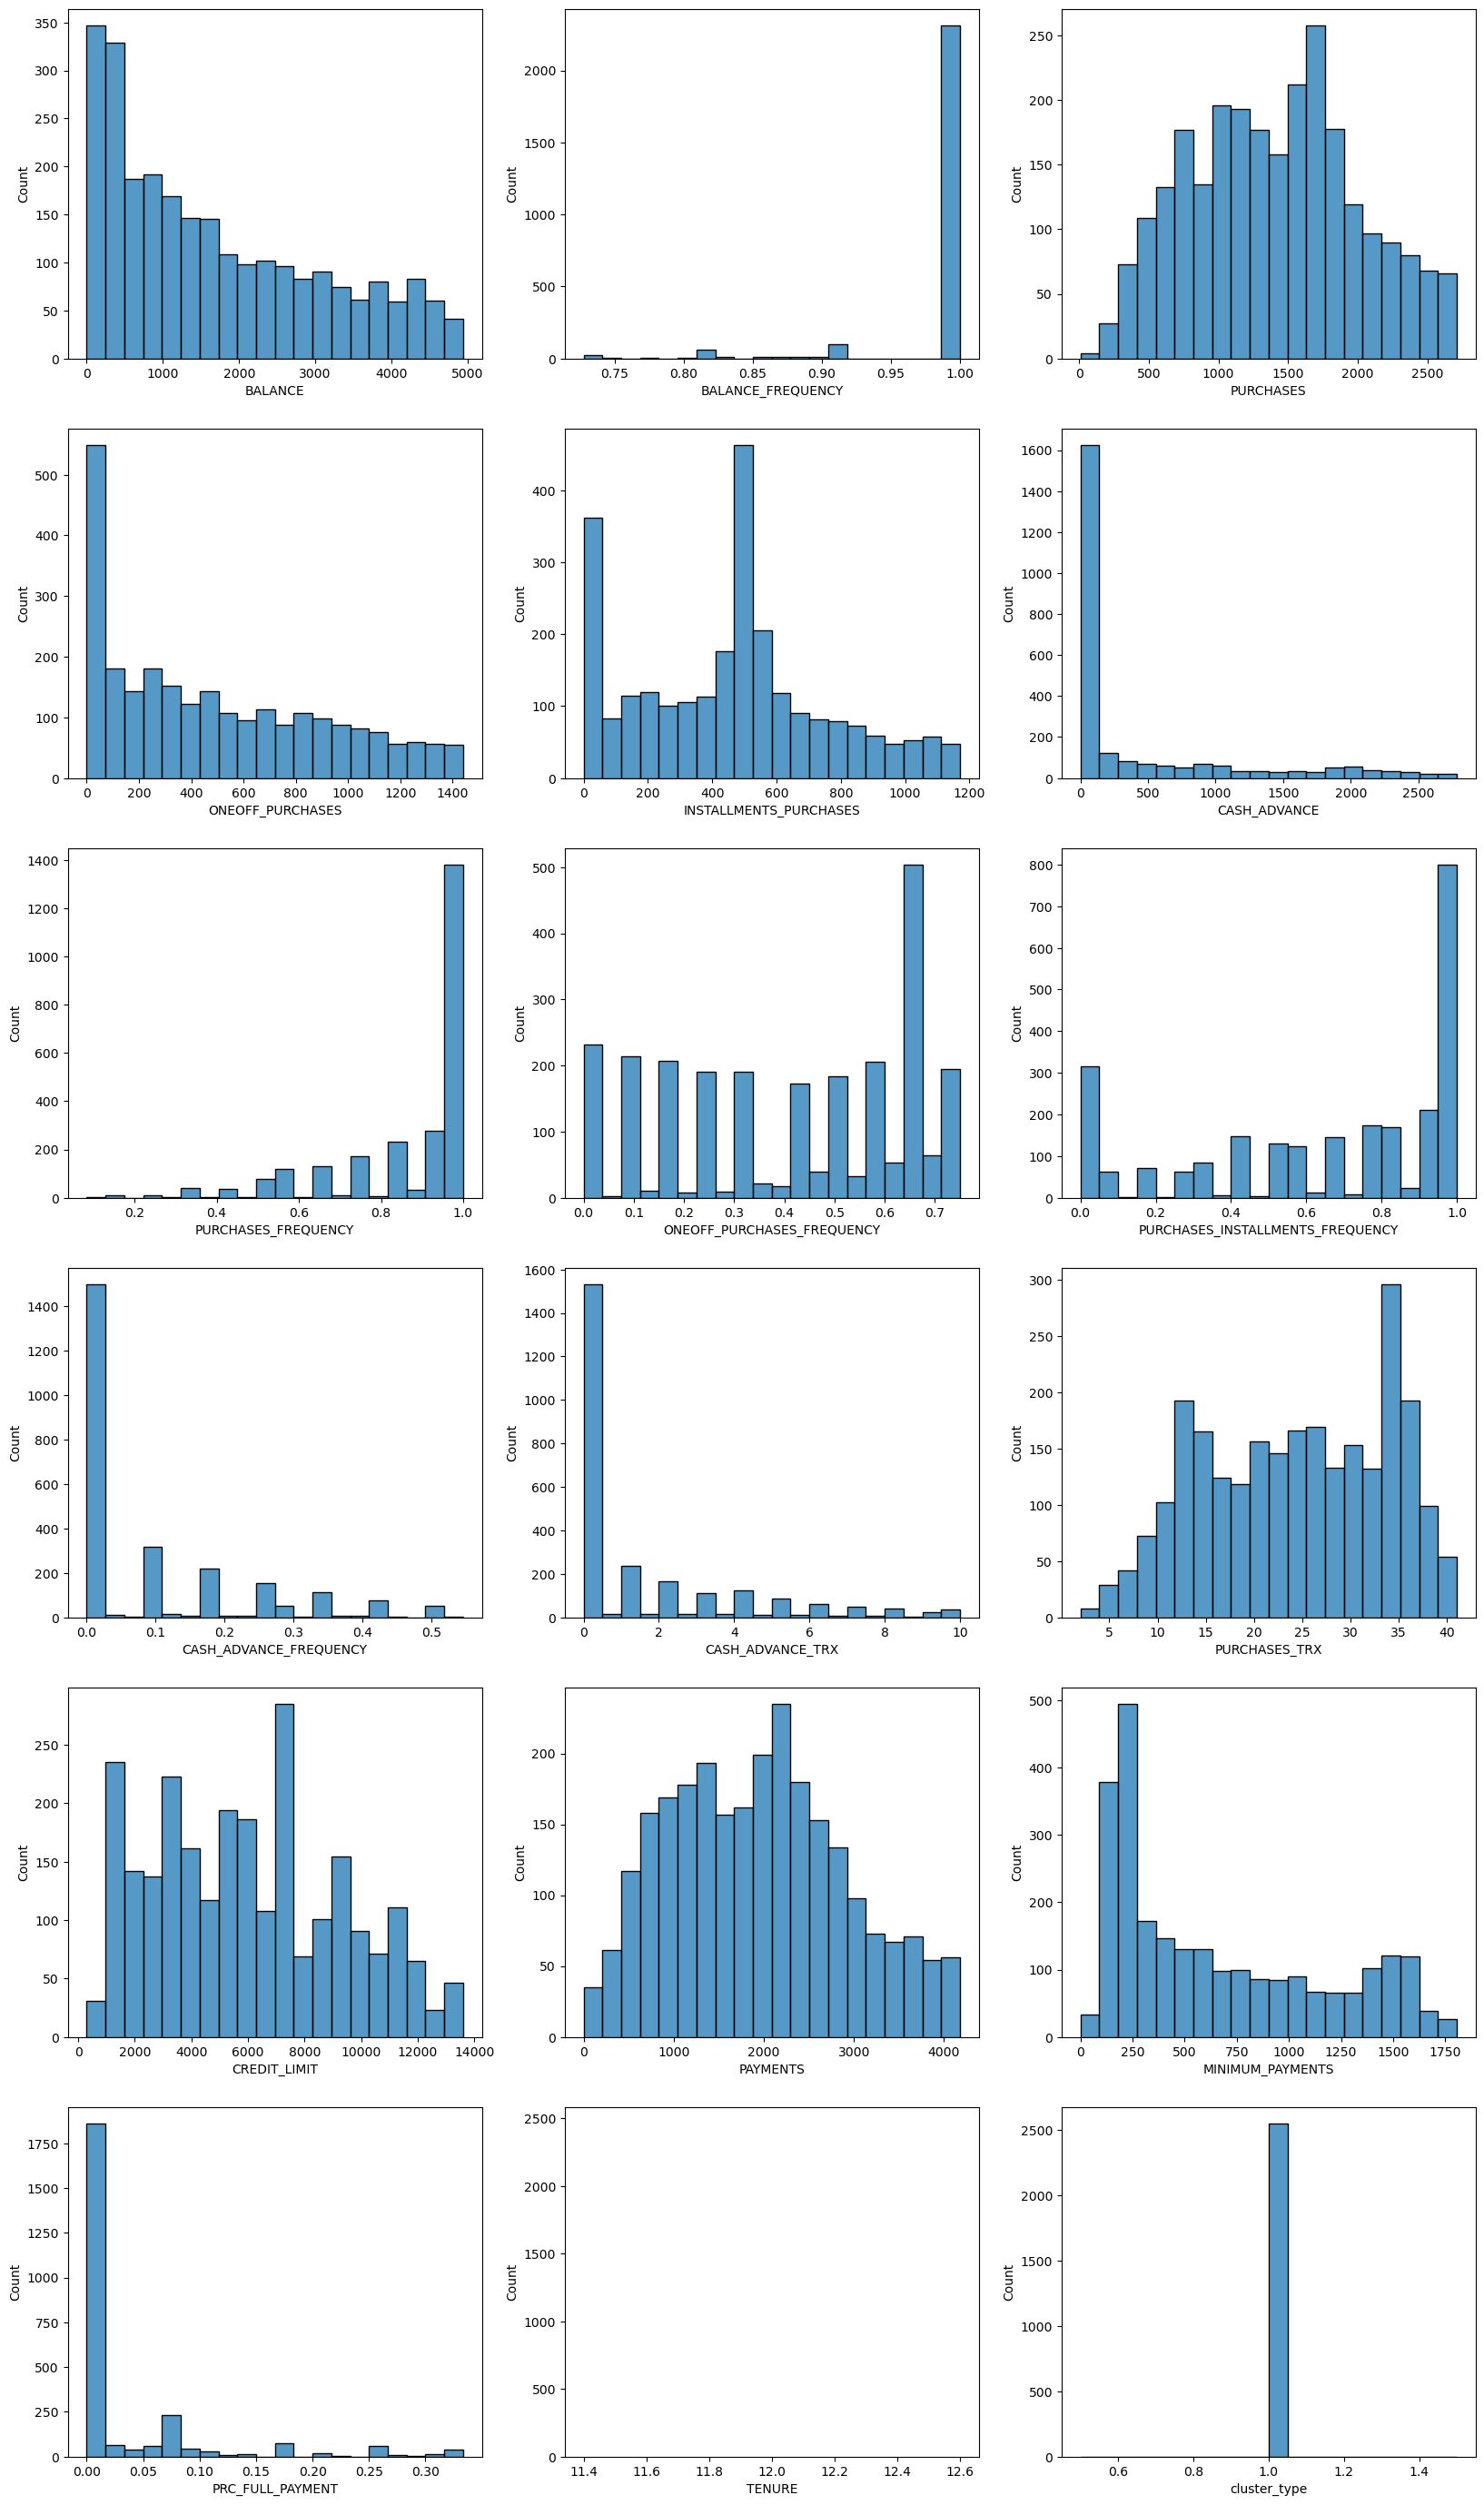

In [205]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['cluster_type'] == 1])

        plt.xlabel(col)
        
plt.show()

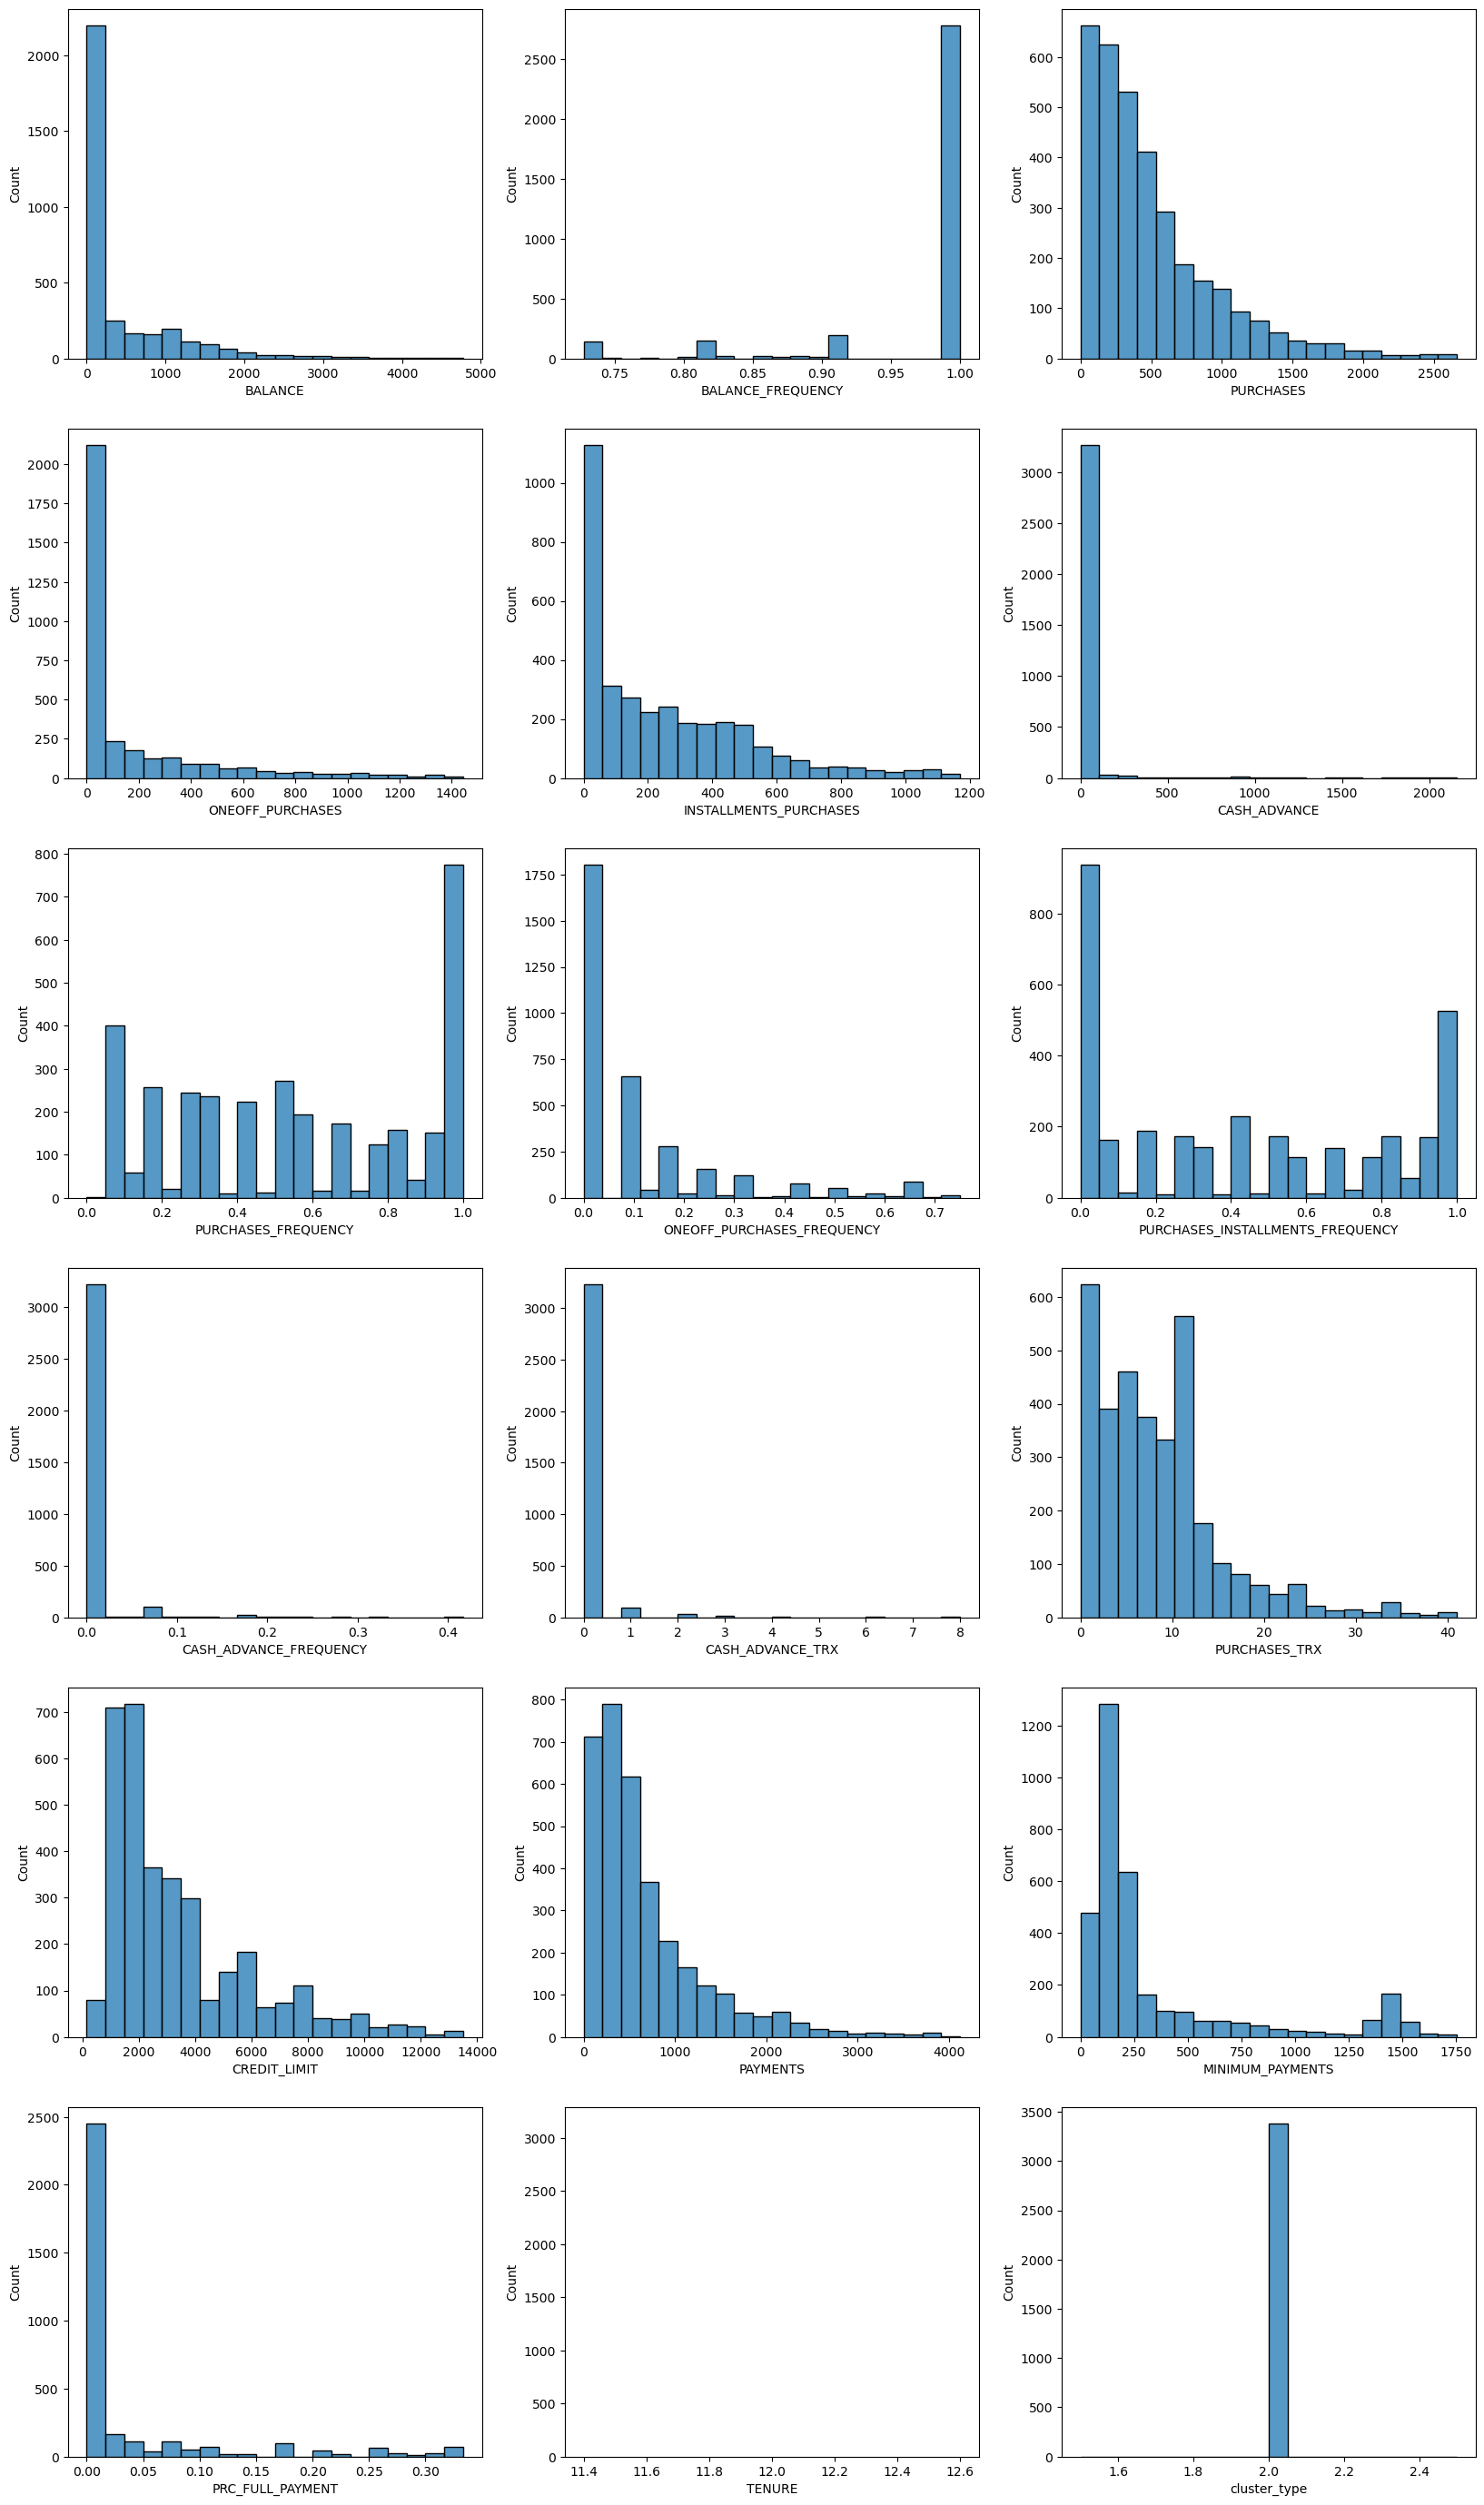

In [206]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['cluster_type'] == 2])

        plt.xlabel(col)
        
plt.show()

In [207]:
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T
df_cluster_summary = df.groupby('cluster_type').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr').hide(axis='index')

Column Name,Metrics,0,1,2,Overall
BALANCE,mean,1818.036888,1691.661408,424.291663,1255.366069
BALANCE_FREQUENCY,mean,0.979129,0.986824,0.970125,0.977919
PURCHASES,mean,109.083254,1397.562555,498.661589,623.404611
ONEOFF_PURCHASES,mean,71.696483,488.864463,168.888860,227.281172
INSTALLMENTS_PURCHASES,mean,24.047608,457.422733,247.412361,231.927626
CASH_ADVANCE,mean,1053.489180,423.935094,18.054897,482.852123
PURCHASES_FREQUENCY,mean,0.088753,0.874890,0.558785,0.490351
ONEOFF_PURCHASES_FREQUENCY,mean,0.043815,0.413997,0.104250,0.172123
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.041741,0.650466,0.436739,0.364437
CASH_ADVANCE_FREQUENCY,mean,0.241580,0.088784,0.005193,0.108721


Cluster 0- Customers in this cluster has high balance,frequency of balance changes is high. The credit card is used for purchases,payments regularly. The purchase frequency  comparatively high in comparison to others. The Customers in this cluster seems to be the active users of credit card.


Cluster 1- Customers in this cluster has low balance. Purchases and Payments are high with respect to balance. Cash in advance given by user is very low. The customers in hthis cluster seems to be Students or someone who is struggling with money. 

Cluster 2- Customers in this cluster has very high balance. The Amount of purchases made and purchases frequency is very low. Cash in Advance is very high. But the amount of payments is high. This cluster of customers seems to be someone who only use credit card for payments and installations.  